In [184]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import ast
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

import seaborn as sns
from scipy.stats.stats import pearsonr

%matplotlib inline

In [185]:
df = pd.read_csv('report.csv')
dataphone = pd.read_csv('smartphone.csv')
dowjones= pd.read_csv('dow_jones_index.csv')
glasses= pd.read_csv('glasses.csv')

In [3]:
df.head()

,index,activity_type,duration,from,to,comment
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,NaN
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,NaN
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,NaN
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,NaN
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,NaN


In [4]:
df.activity_type.unique()

array(['Video games', 'In computer', 'At home', 'Eat', 'Sleep',
       'Watching TV', 'In vehicle', 'Picnic ', 'Walk', 'Running',
       'Phone was out of the pocket (forgot)', 'Train', 'Cooking',
       'In bus', 'Meeting', 'Pause', 'Movie', 'Football', 'Shop',
       'Shopping& wearing', 'Walking&party', 'On bus stop',
       'Took off glasses', 'Work'], dtype=object)

In [5]:
df = df.sort_values(['from', 'to'], ascending=[True, True])

#sort df by from 

In [6]:
for activity in df['activity_type'].unique():
    df[activity] = 0
    

In [7]:
df.activity_type

129                  Eat
128           In vehicle
127                 Walk
126                 Shop
125     Took off glasses
124          On bus stop
123               In bus
122              At home
121                  Eat
120               In bus
119        Walking&party
118               In bus
117              Running
150                  Eat
149                 Walk
148                Train
147                 Walk
146                 Work
145          In computer
144          In computer
143                 Walk
142                 Shop
141                 Walk
140                 Work
139                 Walk
138                Train
137                 Walk
136                  Eat
135              At home
134               In bus
             ...        
86                  Walk
85               At home
84                   Eat
83                In bus
82                  Walk
81                  Shop
80                  Walk
79                In bus
78               At home


In [8]:
del df['comment']

In [9]:
df

,index,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,...,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing
129,12,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,11,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,10,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,9,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,8,Took off glasses,00:08,2017-06-29 12:21,2017-06-29 12:29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,7,On bus stop,00:18,2017-06-29 12:44,2017-06-29 13:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,6,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,5,At home,02:39,2017-06-29 13:28,2017-06-29 16:07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,4,Eat,00:08,2017-06-29 13:36,2017-06-29 13:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,3,In bus,00:32,2017-06-29 16:12,2017-06-29 16:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
index=0
for activity in df['activity_type'].unique():
    for index in range(len(df)):
        if df['activity_type'][index] == activity:
            df[activity][index] = 1
        index+=1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
df

,index,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,...,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing
129,12,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,11,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,10,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
126,9,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
125,8,Took off glasses,00:08,2017-06-29 12:21,2017-06-29 12:29,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,7,On bus stop,00:18,2017-06-29 12:44,2017-06-29 13:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,6,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,5,At home,02:39,2017-06-29 13:28,2017-06-29 16:07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,4,Eat,00:08,2017-06-29 13:36,2017-06-29 13:44,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,3,In bus,00:32,2017-06-29 16:12,2017-06-29 16:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['from'] = df['from'].astype('datetime64[s]')
df['to'] = df['to'].astype('datetime64[s]')

In [13]:
df['houroftheday'] = df['from'].dt.hour

In [14]:
df

,index,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,...,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
129,12,Eat,00:20,2017-06-29 09:57:00,2017-06-29 10:17:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
128,11,In vehicle,00:21,2017-06-29 10:46:00,2017-06-29 11:07:00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,10
127,10,Walk,01:52,2017-06-29 11:09:00,2017-06-29 13:01:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11
126,9,Shop,00:28,2017-06-29 12:12:00,2017-06-29 12:40:00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,12
125,8,Took off glasses,00:08,2017-06-29 12:21:00,2017-06-29 12:29:00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12
124,7,On bus stop,00:18,2017-06-29 12:44:00,2017-06-29 13:02:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
123,6,In bus,00:22,2017-06-29 13:02:00,2017-06-29 13:24:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
122,5,At home,02:39,2017-06-29 13:28:00,2017-06-29 16:07:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
121,4,Eat,00:08,2017-06-29 13:36:00,2017-06-29 13:44:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
120,3,In bus,00:32,2017-06-29 16:12:00,2017-06-29 16:44:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [15]:
def plot_corr(dataset,size=10):
    corr=dataset.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.title('DowJones')

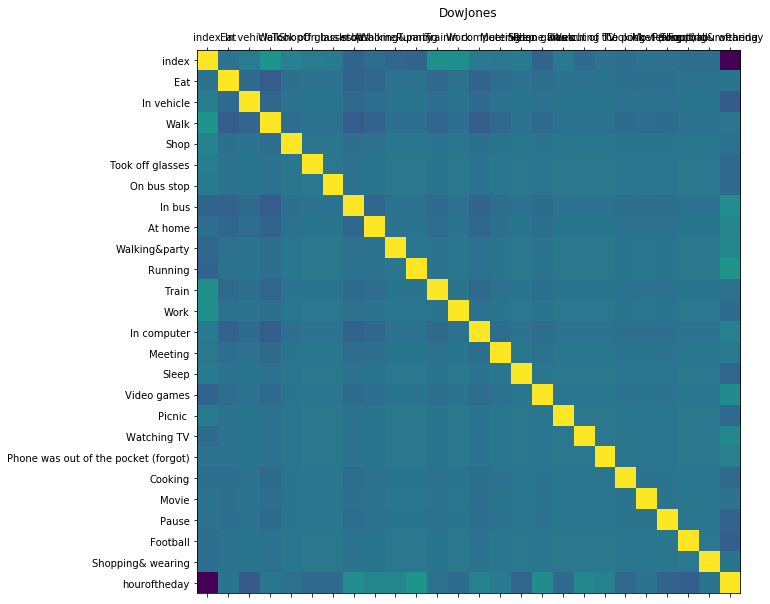

In [16]:
plot_corr(df)

In [17]:
dfindexhour = df

In [18]:
dfindexhour = dfindexhour.reset_index(drop=True)

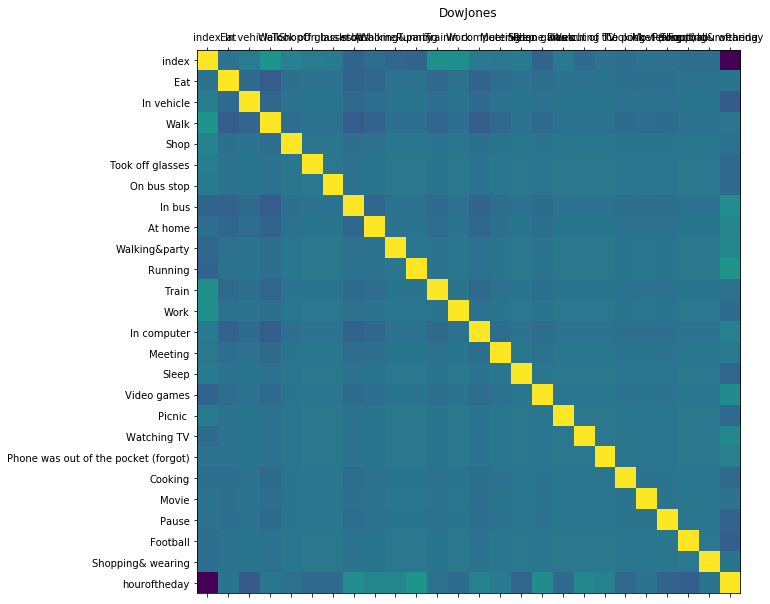

In [19]:
plot_corr(dfindexhour)

In [20]:
dfindexhour['index']=dfindexhour.index

In [21]:
dfindexhour=dfindexhour.set_index('index')

In [22]:
dfindexhour

,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,On bus stop,...,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
index,,,,,,,,,,,,,,,,,,,,,
0,Eat,00:20,2017-06-29 09:57:00,2017-06-29 10:17:00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,In vehicle,00:21,2017-06-29 10:46:00,2017-06-29 11:07:00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Walk,01:52,2017-06-29 11:09:00,2017-06-29 13:01:00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,Shop,00:28,2017-06-29 12:12:00,2017-06-29 12:40:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12
4,Took off glasses,00:08,2017-06-29 12:21:00,2017-06-29 12:29:00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,12
5,On bus stop,00:18,2017-06-29 12:44:00,2017-06-29 13:02:00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12
6,In bus,00:22,2017-06-29 13:02:00,2017-06-29 13:24:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
7,At home,02:39,2017-06-29 13:28:00,2017-06-29 16:07:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
8,Eat,00:08,2017-06-29 13:36:00,2017-06-29 13:44:00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


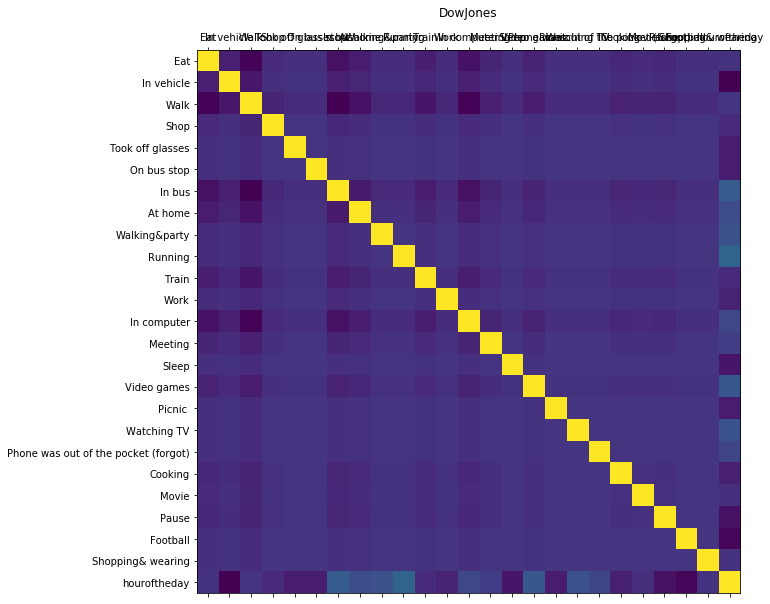

In [23]:
plot_corr(dfindexhour)

In [24]:
corr = df.corr()
df.corr().style.background_gradient()


,index,Eat,In vehicle,Walk,Shop,Took off glasses,On bus stop,In bus,At home,Walking&party,Running,Train,Work,In computer,Meeting,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
index,1,-0.0328959,0.0302329,0.198015,0.0729195,0.030903,0.0145298,-0.128691,-0.0625379,-0.118779,-0.130396,0.162597,0.160014,0.024482,-0.00417791,0.0145298,-0.133766,0.0145298,-0.0837092,-0.0345897,-0.061612,-0.0317644,-0.0368029,-0.067336,-0.067336,-0.668418
Eat,-0.0328959,1,-0.0870137,-0.179362,-0.0523769,-0.0300376,-0.0300376,-0.139573,-0.10312,-0.0426218,-0.0426218,-0.0926163,-0.0426218,-0.135338,-0.0680799,-0.0300376,-0.0748345,-0.0300376,-0.0300376,-0.0300376,-0.0606851,-0.0523769,-0.0606851,-0.0300376,-0.0300376,-0.0192301
In vehicle,0.0302329,-0.0870137,1,-0.115318,-0.0336749,-0.0193122,-0.0193122,-0.089736,-0.0662994,-0.027403,-0.027403,-0.0595462,-0.027403,-0.0870137,-0.0437709,-0.0193122,-0.0481137,-0.0193122,-0.0193122,-0.0193122,-0.0390165,-0.0336749,-0.0390165,-0.0193122,-0.0193122,-0.193066
Walk,0.198015,-0.179362,-0.115318,1,-0.0694143,-0.0398083,-0.0398083,-0.184973,-0.136663,-0.056486,-0.056486,-0.122743,-0.056486,-0.179362,-0.0902252,-0.0398083,-0.0991769,-0.0398083,-0.0398083,-0.0398083,-0.0804249,-0.0694143,-0.0804249,-0.0398083,-0.0398083,-0.0155035
Shop,0.0729195,-0.0523769,-0.0336749,-0.0694143,1,-0.0116248,-0.0116248,-0.0540156,-0.0399082,-0.016495,-0.016495,-0.0358432,-0.016495,-0.0523769,-0.0263474,-0.0116248,-0.0289615,-0.0116248,-0.0116248,-0.0116248,-0.0234856,-0.0202703,-0.0234856,-0.0116248,-0.0116248,-0.0472216
Took off glasses,0.030903,-0.0300376,-0.0193122,-0.0398083,-0.0116248,1,-0.00666667,-0.0309773,-0.0228869,-0.00945968,-0.00945968,-0.0205557,-0.00945968,-0.0300376,-0.0151099,-0.00666667,-0.0166091,-0.00666667,-0.00666667,-0.00666667,-0.0134687,-0.0116248,-0.0134687,-0.00666667,-0.00666667,-0.0955202
On bus stop,0.0145298,-0.0300376,-0.0193122,-0.0398083,-0.0116248,-0.00666667,1,-0.0309773,-0.0228869,-0.00945968,-0.00945968,-0.0205557,-0.00945968,-0.0300376,-0.0151099,-0.00666667,-0.0166091,-0.00666667,-0.00666667,-0.00666667,-0.0134687,-0.0116248,-0.0134687,-0.00666667,-0.00666667,-0.0955202
In bus,-0.128691,-0.139573,-0.089736,-0.184973,-0.0540156,-0.0309773,-0.0309773,1,-0.106346,-0.0439553,-0.0439553,-0.095514,-0.0439553,-0.139573,-0.0702099,-0.0309773,-0.0771759,-0.0309773,-0.0309773,-0.0309773,-0.0625837,-0.0540156,-0.0625837,-0.0309773,-0.0309773,0.152423
At home,-0.0625379,-0.10312,-0.0662994,-0.136663,-0.0399082,-0.0228869,-0.0228869,-0.106346,1,-0.0324754,-0.0324754,-0.0705683,-0.0324754,-0.10312,-0.0518729,-0.0228869,-0.0570196,-0.0228869,-0.0228869,-0.0228869,-0.0462385,-0.0399082,-0.0462385,-0.0228869,-0.0228869,0.0885851
Walking&party,-0.118779,-0.0426218,-0.027403,-0.056486,-0.016495,-0.00945968,-0.00945968,-0.0439553,-0.0324754,1,-0.0134228,-0.0291675,-0.0134228,-0.0426218,-0.0214403,-0.00945968,-0.0235675,-0.00945968,-0.00945968,-0.00945968,-0.0191114,-0.016495,-0.0191114,-0.00945968,-0.00945968,0.101172


In [26]:

cmap = cmap=sns.diverging_palette(0,10, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_precision(10)\
 

,index,Eat,In vehicle,Walk,Shop,Took off glasses,On bus stop,In bus,At home,Walking&party,Running,Train,Work,In computer,Meeting,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
index,1,-0.0328959266,0.03023286397,0.1980146478,0.0729194612,0.03090301179,0.01452983712,-0.1286909783,-0.06253788414,-0.1187792944,-0.1303956632,0.1625970631,0.1600135572,0.02448195197,-0.004177909928,0.01452983712,-0.1337656495,0.01452983712,-0.08370921088,-0.03458968688,-0.06161201841,-0.03176439796,-0.03680291233,-0.06733603622,-0.06733603622,-0.6684180728
Eat,-0.0328959266,1,-0.08701365406,-0.1793616191,-0.05237694959,-0.03003757046,-0.03003757046,-0.1395726316,-0.103119965,-0.04262184994,-0.04262184994,-0.09261631867,-0.04262184994,-0.1353383459,-0.06807991523,-0.03003757046,-0.07483453357,-0.03003757046,-0.03003757046,-0.03003757046,-0.06068505646,-0.05237694959,-0.06068505646,-0.03003757046,-0.03003757046,-0.01923007779
In vehicle,0.03023286397,-0.08701365406,1,-0.115317723,-0.03367493332,-0.01931218198,-0.01931218198,-0.08973602124,-0.06629935441,-0.02740304592,-0.02740304592,-0.05954620076,-0.02740304592,-0.08701365406,-0.04377090731,-0.01931218198,-0.0481136826,-0.01931218198,-0.01931218198,-0.01931218198,-0.03901649954,-0.03367493332,-0.03901649954,-0.01931218198,-0.01931218198,-0.193066172
Walk,0.1980146478,-0.1793616191,-0.115317723,1,-0.06941428479,-0.03980828373,-0.03980828373,-0.1849732463,-0.1366631442,-0.05648601633,-0.05648601633,-0.1227428396,-0.05648601633,-0.1793616191,-0.09022515938,-0.03980828373,-0.09917694074,-0.03980828373,-0.03980828373,-0.03980828373,-0.08042487821,-0.06941428479,-0.08042487821,-0.03980828373,-0.03980828373,-0.01550349063
Shop,0.0729194612,-0.05237694959,-0.03367493332,-0.06941428479,1,-0.01162476387,-0.01162476387,-0.05401564975,-0.03990819581,-0.01649497392,-0.01649497392,-0.03584320633,-0.01649497392,-0.05237694959,-0.02634743513,-0.01162476387,-0.02896152282,-0.01162476387,-0.01162476387,-0.01162476387,-0.02348556962,-0.02027027027,-0.02348556962,-0.01162476387,-0.01162476387,-0.0472216427
Took off glasses,0.03090301179,-0.03003757046,-0.01931218198,-0.03980828373,-0.01162476387,1,-0.006666666667,-0.03097734591,-0.02288688541,-0.009459675397,-0.009459675397,-0.02055566129,-0.009459675397,-0.03003757046,-0.01510994713,-0.006666666667,-0.01660909597,-0.006666666667,-0.006666666667,-0.006666666667,-0.01346870059,-0.01162476387,-0.01346870059,-0.006666666667,-0.006666666667,-0.09552023127
On bus stop,0.01452983712,-0.03003757046,-0.01931218198,-0.03980828373,-0.01162476387,-0.006666666667,1,-0.03097734591,-0.02288688541,-0.009459675397,-0.009459675397,-0.02055566129,-0.009459675397,-0.03003757046,-0.01510994713,-0.006666666667,-0.01660909597,-0.006666666667,-0.006666666667,-0.006666666667,-0.01346870059,-0.01162476387,-0.01346870059,-0.006666666667,-0.006666666667,-0.09552023127
In bus,-0.1286909783,-0.1395726316,-0.08973602124,-0.1849732463,-0.05401564975,-0.03097734591,-0.03097734591,1,-0.1063462449,-0.04395534554,-0.04395534554,-0.09551397455,-0.04395534554,-0.1395726316,-0.07020990884,-0.03097734591,-0.07717585667,-0.03097734591,-0.03097734591,-0.03097734591,-0.06258368959,-0.05401564975,-0.06258368959,-0.03097734591,-0.03097734591,0.1524234625
At home,-0.06253788414,-0.103119965,-0.06629935441,-0.1366631442,-0.03990819581,-0.02288688541,-0.02288688541,-0.1063462449,1,-0.03247537602,-0.03247537602,-0.07056825969,-0.03247537602,-0.103119965,-0.05187294428,-0.02288688541,-0.05701957144,-0.02288688541,-0.02288688541,-0.02288688541,-0.04623849107,-0.03990819581,-0.04623849107,-0.02288688541,-0.02288688541,0.08858512248
Walking&party,-0.1187792944,-0.04262184994,-0.02740304592,-0.05648601633,-0.01649497392,-0.009459675397,-0.009459675397,-0.04395534554,-0.03247537602,1,-0.01342281879,-0.02916748251,-0.01342281879,-0.04262184994,-0.02144027927,-0.009459675397,-0.02356749848,-0.009459675397,-0.009459675397,-0.009459675397,-0

In [27]:
dowjones.head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [28]:
dowjones.shape

(750, 16)

In [231]:
#Imputation - drops data with an empty element
#30 entries are dropped.
dowjones.dropna().head()


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712


In [232]:
dowjones.dropna().shape

(720, 16)

In [233]:
dowjones2 = dowjones.dropna()

In [234]:
dowjones2.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712


In [235]:
#Date is an object, not a datetime convert it to datetime
dowjones2.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [236]:
#converted object variable to datetime variable
dowjones2['date']=pd.to_datetime(dowjones['date'])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [237]:
dowjonesclose=dowjones2.sort_values(['date'],ascending=True)

In [238]:
dowjonesclose=dowjonesclose[['date','stock','close']]


In [239]:
dowjonescloseAA=dowjonesclose[dowjonesclose['stock']=='AA']

In [351]:
dowjones2CSCO=dowjones2[dowjones2['stock']=='CSCO']

In [328]:
djAA=dowjones2
names=djAA.columns
for i in names:
    if djAA[i].dtype=='object':
        djAA[i]=djAA[i].str.replace('$','')
        djAA[i]=djAA[i].astype('float64')
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


ValueError: could not convert string to float: 'XOM'

In [330]:
del djAA['quarter']

In [335]:
djAA2=djAA.sort_values(['date'],ascending=True)

In [348]:
stockrows=djAA2['stock'].unique()

In [353]:
dowjones2CSCO

,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
61,CSCO,2011-01-14,20.94,21.23,20.70,21.21,154708263,1.289400,-49.032988,3.035459e+08,21.22,20.72,-2.356270,74,0.282885
62,CSCO,2011-01-21,21.22,21.33,20.50,20.72,193706863,-2.356270,25.207833,1.547083e+08,20.84,20.93,0.431862,67,0.289575
63,CSCO,2011-01-28,20.84,21.61,20.73,20.93,265687272,0.431862,37.159452,1.937069e+08,20.93,22.05,5.351170,60,0.286670
64,CSCO,2011-02-04,20.93,22.15,20.71,22.05,236334561,5.351170,-11.047842,2.656873e+08,22.11,18.70,-15.422900,53,0.272109
65,CSCO,2011-02-11,22.11,22.34,18.61,18.70,1000362015,-15.422900,323.282152,2.363346e+08,18.84,18.85,0.053079,46,0.320856
66,CSCO,2011-02-18,18.84,18.95,18.56,18.85,390258123,0.053079,-60.988311,1.000362e+09,18.73,18.64,-0.480513,39,0.318302
67,CSCO,2011-02-25,18.73,18.74,18.23,18.64,285212201,-0.480513,-26.917037,3.902581e+08,18.62,18.40,-1.181530,32,0.321888
68,CSCO,2011-03-04,18.62,18.79,18.31,18.40,302059981,-1.181530,5.907104,2.852122e+08,18.36,17.95,-2.233120,25,0.326087
69,CSCO,2011-03-11,18.36,18.37,17.76,17.95,311209442,-2.233120,3.029021,3.020600e+08,17.81,17.14,-3.761930,18,0.334262
70,CSCO,2011-03-18,17.81,17.88,16.97,17.14,444161658,-3.761930,42.721138,3.112094e+08,17.34,17.28,-0.346021,11,0.350058


In [241]:
dowjonescloseAA['AA']=dowjonescloseAA['close']
#dowjonescloseCSCO['CSCO']=dowjonescloseCSCO['close']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [242]:
del dowjonescloseAA['stock']
del dowjonescloseAA['close']
del dowjonescloseCSCO['stock']
del dowjonescloseCSCO['close']

In [243]:
dowjonescloseAA['AA']=dowjonescloseAA['AA'].str.replace('$','')
dowjonescloseAA['AA']=dowjonescloseAA['AA'].astype('float64')
dowjonescloseCSCO['CSCO']=dowjonescloseCSCO['CSCO'].str.replace('$','')
dowjonescloseCSCO['CSCO']=dowjonescloseCSCO['CSCO'].astype('float64')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [244]:
dowjonescloseAA['date'] = pd.to_datetime(dowjonescloseAA['date'])
dowjonescloseAA=dowjonescloseAA.set_index(dowjonescloseAA['date'])
dowjonescloseCSCO['date'] = pd.to_datetime(dowjonescloseCSCO['date'])
dowjonescloseCSCO=dowjonescloseCSCO.set_index(dowjonescloseCSCO['date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
dowjonesconcat= pd.concat([dowjonescloseAA, dowjonescloseCSCO], axis=1)


In [246]:
del dowjonesconcat['date']

In [296]:
del dowjonescloseAA['date']

In [248]:
datareturn = dowjonesconcat.AA.diff()/ dowjonesconcat.AA.shift(1)

In [255]:
data=pd.DataFrame(dowjonescloseAA.copy())
data = (datareturn - datareturn.mean()) / datareturn.std()
data = data.dropna()

In [257]:
datareturn2 = dowjonesconcat.diff()/dowjonesconcat.shift(1)
data2 = pd.DataFrame(dowjonesconcat.copy())
data2= (dowjonesconcat-dowjonesconcat.mean())/dowjonesconcat.std()
data2 = data2.dropna()

<Figure size 1440x1440 with 0 Axes>

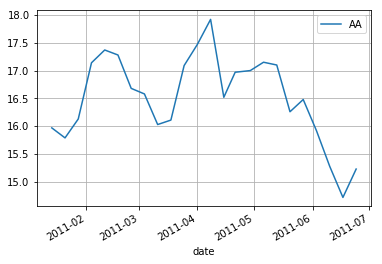

In [300]:
plt.figure(figsize=(20, 20))
dowjonescloseAA.plot()
plt.grid(True);
plt.legend()
plt.show()

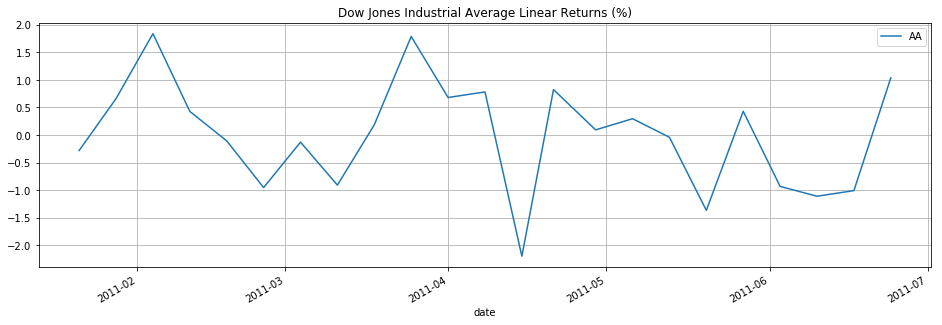

In [302]:
plt.figure(figsize=(16, 5))
plt.title("Dow Jones Industrial Average Linear Returns (%)")
data.plot()
plt.grid(True);
plt.legend()
plt.show()

In [277]:
stock_tickers = data.values[:-1]
n_tickers = len(stock_tickers)

In [ ]:
plot_corr(dowjones2)

cmap = cmap=sns.diverging_palette(0,10, as_cmap=True)

dowjones2.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_precision(10)\
 

In [284]:
dowjones2['open']=dowjones2['open'].str.replace('$', '')
dowjones2['close']=dowjones2['close'].str.replace('$','')
dowjones2['high']=dowjones2['high'].str.replace('$','')
dowjones2['low']=dowjones2['low'].str.replace('$','')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [285]:
dowjones2['open']=dowjones2['open'].astype('float64')
dowjones2['close']=dowjones2['close'].astype('float64')
dowjones2['high']=dowjones2['high'].astype('float64')
dowjones2['low']=dowjones2['low'].astype('float64')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [290]:

dowjones2

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2011-02-11,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2011-02-18,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2011-02-25,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,2011-03-04,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,2011-03-11,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149
10,1,AA,2011-03-18,15.95,16.33,15.43,16.11,130374108,1.003130,14.030601,114332562.0,$16.38,$17.09,4.334550,55,0.186220


In [280]:
price_index = make_pca_index(dowjones2)


NameError: name 'scale' is not defined

In [ ]:
sns.pairplot(dowjones2)

In [ ]:
glasses['DATE']=pd.to_datetime(glasses['DATE'])


In [ ]:
plot_corr(dowjones2)


In [ ]:
dfresample=dfindexhour

In [ ]:
period = pd.DatetimeIndex(start=dfresample[:1]['from'][0],end=dfresample[:1]['to'][0],freq='1s')


In [ ]:
dfresample.index[dfresample.index.duplicated()].unique()


In [ ]:
dfresample = dfresample[~dfresample.index.duplicated(keep='first')]


In [ ]:
dfresample.to.dtypes

In [ ]:
dfresample

In [ ]:
dfresample2.shape

In [ ]:
dfresample2[:1].resample('1s').ffill()